In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 6.66)

In [3]:
def set_font_size(ax):
    ax.legend(loc='best', fontsize=26)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        item.set_fontsize(26)
    for item in ax.get_xticklabels():
        item.set_fontsize(26)
    for item in ax.get_yticklabels():
        item.set_fontsize(26)

In [4]:
df_dir = {}

In [5]:
as_number = '13129'
sfc_duration = '3600'
opt_name = {'c':'Optimal', 't':'Tabu Search', 'f':'First Fit'}
for opt in opt_name.keys():
    for ar in range(1, 11):
        arrival_rate = '{:4.2f}'.format(ar*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration
        df_id = run_id.replace('.', '_')
        exec(df_id + '_df = pd.read_csv(' + '"metric_vs_arrival_rate_data/' + run_id + '/timeslot_data.csv' + '", index_col="timeslot")' )
        exec('df_dir["' + df_id + '"] = ' + df_id + '_df')
        df_dir[df_id]['Optimizer'] = opt_name[opt]
        df_dir[df_id]['Arrival Rate'] = arrival_rate
        df_dir[df_id]['Renewable Energy'] = (df_dir[df_id]['green_energy'] / (df_dir[df_id]['green_energy'] + df_dir[df_id]['brown_energy']))
        print(df_id)

c_13129_0_01_3600
c_13129_0_02_3600
c_13129_0_03_3600
c_13129_0_04_3600
c_13129_0_05_3600
c_13129_0_06_3600
c_13129_0_07_3600
c_13129_0_08_3600
c_13129_0_09_3600
c_13129_0_10_3600
t_13129_0_01_3600
t_13129_0_02_3600
t_13129_0_03_3600
t_13129_0_04_3600
t_13129_0_05_3600
t_13129_0_06_3600
t_13129_0_07_3600
t_13129_0_08_3600
t_13129_0_09_3600
t_13129_0_10_3600
f_13129_0_01_3600
f_13129_0_02_3600
f_13129_0_03_3600
f_13129_0_04_3600
f_13129_0_05_3600
f_13129_0_06_3600
f_13129_0_07_3600
f_13129_0_08_3600
f_13129_0_09_3600
f_13129_0_10_3600


In [6]:
ar_df = pd.concat(list(df_dir.values()), axis=0)

In [7]:
ar_df.columns

Index(['carbon_footprint', 'brown_energy', 'green_energy', 'acceptance_ratio',
       'migration_count', 'ps_min', 'ps_5th', 'ps_mean', 'ps_95th', 'ps_max',
       'Optimizer', 'Arrival Rate', 'Renewable Energy'],
      dtype='object')

In [8]:
ar_df.dropna(inplace=True)

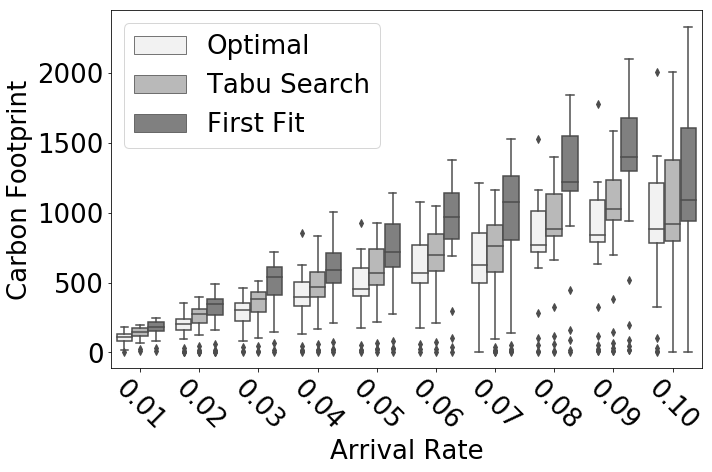

In [9]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Arrival Rate", y="carbon_footprint", 
                 hue="Optimizer", hue_order=['Optimal', 'Tabu Search', 'First Fit'], 
                 data=ar_df, color="0.5")
set_font_size(ax)
plt.xticks(rotation=-45)
ax.set_ylabel('Carbon Footprint')
plt.tight_layout()

In [10]:
fig.savefig('13129_carbon_footprint.pdf', dpi=1200)

In [11]:
as_number = '13129'
sfc_duration = '3600'
opt_name = {'c':'Optimal', 't':'Tabu Search', 'f':'First Fit'}
for opt in opt_name.keys():
    for ar in range(1, 11):
        arrival_rate = '{:4.2f}'.format(ar*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration
        df_id = run_id.replace('.', '_')
        cdf_id = ('c_' + as_number + '_' + arrival_rate + '_' + sfc_duration).replace('.', '_')
        print(df_id, df_dir[df_id]['carbon_footprint'].mean() / df_dir[cdf_id]['carbon_footprint'].mean())

c_13129_0_01_3600 1.0
c_13129_0_02_3600 1.0
c_13129_0_03_3600 1.0
c_13129_0_04_3600 1.0
c_13129_0_05_3600 1.0
c_13129_0_06_3600 1.0
c_13129_0_07_3600 1.0
c_13129_0_08_3600 1.0
c_13129_0_09_3600 1.0
c_13129_0_10_3600 1.0
t_13129_0_01_3600 1.3361594489232504
t_13129_0_02_3600 1.2970556296060114
t_13129_0_03_3600 1.2178059295754269
t_13129_0_04_3600 1.2050704614318837
t_13129_0_05_3600 1.220959800832784
t_13129_0_06_3600 1.1507380407210366
t_13129_0_07_3600 1.1411166144847373
t_13129_0_08_3600 1.1347525735641122
t_13129_0_09_3600 1.1556452008503655
t_13129_0_10_3600 1.0923053755811498
f_13129_0_01_3600 1.6838467094090521
f_13129_0_02_3600 1.6144144066640753
f_13129_0_03_3600 1.7099816907970515
f_13129_0_04_3600 1.4931630236996456
f_13129_0_05_3600 1.516901555470051
f_13129_0_06_3600 1.5671988137373012
f_13129_0_07_3600 1.5861285097342765
f_13129_0_08_3600 1.5497176718183758
f_13129_0_09_3600 1.5668029751185921
f_13129_0_10_3600 1.2844802249337588


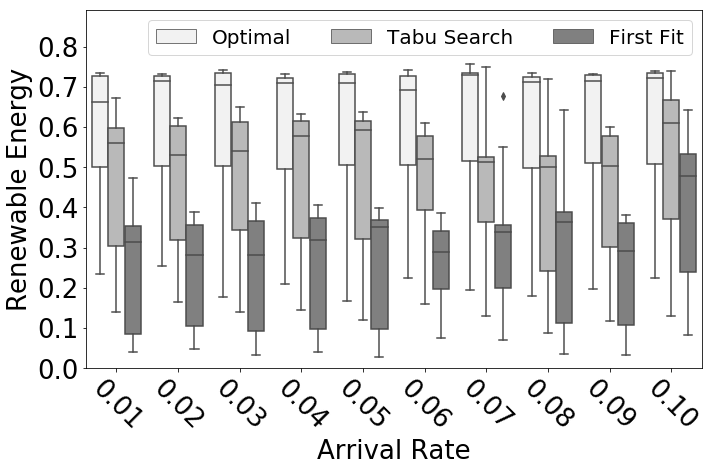

In [12]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Arrival Rate", y="Renewable Energy", 
                 hue="Optimizer", hue_order=['Optimal', 'Tabu Search', 'First Fit'], 
                 data=ar_df, color="0.5")
set_font_size(ax)
plt.xticks(rotation=-45)
ax.set_ylim(0, 0.89)
plt.legend(loc='upper right', ncol=3, fontsize=20)
plt.tight_layout()

In [13]:
fig.savefig('13129_renewable_energy.pdf', dpi=1200)

In [14]:
as_number = '13129'
sfc_duration = '3600'
opt_name = {'c':'Optimal', 't':'Tabu Search', 'f':'First Fit'}
for opt in opt_name.keys():
    for ar in range(1, 11):
        arrival_rate = '{:4.2f}'.format(ar*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration
        df_id = run_id.replace('.', '_')
        cdf_id = ('c_' + as_number + '_' + arrival_rate + '_' + sfc_duration).replace('.', '_')
        print(df_id, df_dir[df_id]['Renewable Energy'].mean() / df_dir[cdf_id]['Renewable Energy'].mean())

c_13129_0_01_3600 1.0
c_13129_0_02_3600 1.0
c_13129_0_03_3600 1.0
c_13129_0_04_3600 1.0
c_13129_0_05_3600 1.0
c_13129_0_06_3600 1.0
c_13129_0_07_3600 1.0
c_13129_0_08_3600 1.0
c_13129_0_09_3600 1.0
c_13129_0_10_3600 1.0
t_13129_0_01_3600 0.7603140514759407
t_13129_0_02_3600 0.7576876790357633
t_13129_0_03_3600 0.777143571555088
t_13129_0_04_3600 0.7871194022477468
t_13129_0_05_3600 0.7850480146195494
t_13129_0_06_3600 0.764017057641699
t_13129_0_07_3600 0.7176098806538898
t_13129_0_08_3600 0.667186929428103
t_13129_0_09_3600 0.7118977155610571
t_13129_0_10_3600 0.8435364976158021
f_13129_0_01_3600 0.4000168986190083
f_13129_0_02_3600 0.39651913553241663
f_13129_0_03_3600 0.3991256319301561
f_13129_0_04_3600 0.4262645473333619
f_13129_0_05_3600 0.41963615857316766
f_13129_0_06_3600 0.4278154686986611
f_13129_0_07_3600 0.4753329833616609
f_13129_0_08_3600 0.46162048276220835
f_13129_0_09_3600 0.3988421688013416
f_13129_0_10_3600 0.6435872651279563
